# Useful Imports

In [2]:
import pandas as pd

# DataViz
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [3]:
transactions_1 = pd.read_csv('../data/transactions_1.csv')
transactions_1 = transactions_1.drop('Unnamed: 0', axis=1)
transactions_2 = pd.read_csv('../data/transactions_2.csv')
transactions_2 = transactions_2.drop('Unnamed: 0', axis=1)
transactions = pd.concat([transactions_1, transactions_2], axis=0)
transactions

,customer_id,product_id,date
0,8649525,Opel,2017-01-31T09:31:08.873Z
1,8649525,Volkswagen,2017-02-03T16:59:16.610Z
2,8649525,Volkswagen,2017-02-05T19:47:55.353Z
3,8649525,Volkswagen,2017-02-05T19:48:14.633Z
4,8649525,Volkswagen,2017-02-06T09:59:49.053Z
...,...,...,...
475950,1111821,Renault,2019-05-17T10:06:43.037Z
475951,4232782,Renault,2017-10-27T17:49:54.483Z
475952,4746355,Seat,2019-01-09T16:31:08.133Z
475953,4743766,Opel,2017-03-29T16:25:05.907Z


# Process Data

In [6]:
# Duplicates
transactions = transactions.drop_duplicates()

# Data types
transactions["date"] = pd.to_datetime(transactions["date"], errors="coerce")

C:\Users\moote\AppData\Local\Temp\ipykernel_20760\2378459046.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions["date"] = pd.to_datetime(transactions["date"], errors="coerce")


# Create an ordered (descending) plot that shows the total number of transactions per customer from the most active customer to the least active one.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '8649525'),
  Text(1, 0, '1242611'),
  Text(2, 0, '9467115'),
  Text(3, 0, '1618902'),
  Text(4, 0, '1435341'),
  Text(5, 0, '5741989'),
  Text(6, 0, '8423804'),
  Text(7, 0, '4893343'),
  Text(8, 0, '6026638'),
  Text(9, 0, '5102428')])

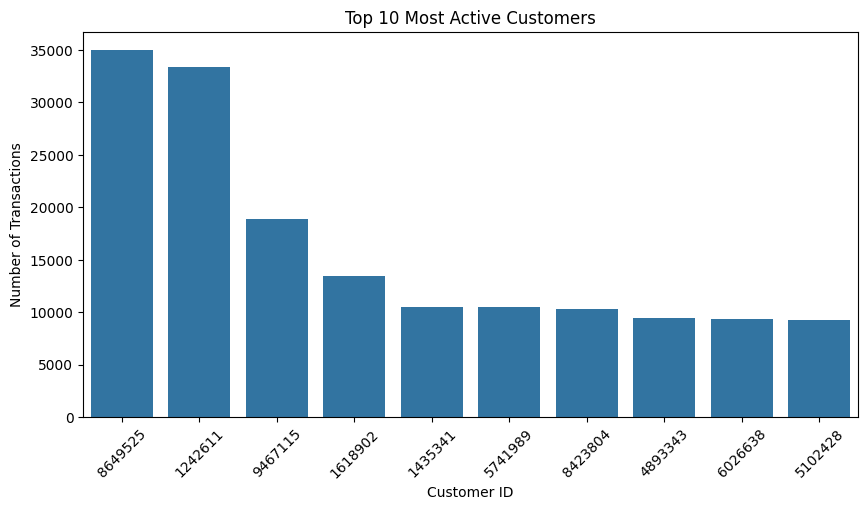

In [7]:
transactions_per_customer = transactions["customer_id"].value_counts()
transactions_per_customer = transactions_per_customer.sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=transactions_per_customer.index[:10], y=transactions_per_customer.values[:10], order=transactions_per_customer.index[:10])
plt.xlabel("Customer ID")
plt.ylabel("Number of Transactions")
plt.title("Top 10 Most Active Customers")
plt.xticks(rotation=45)

# Given any product ID, create a plot to show its transaction frequency per month for the year 2018.

C:\Users\moote\AppData\Local\Temp\ipykernel_20760\2599165268.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions["year"] = transactions["date"].dt.year
C:\Users\moote\AppData\Local\Temp\ipykernel_20760\2599165268.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions["month"] = transactions["date"].dt.month


Text(0.5, 1.0, 'Sales of Renault in 2018')

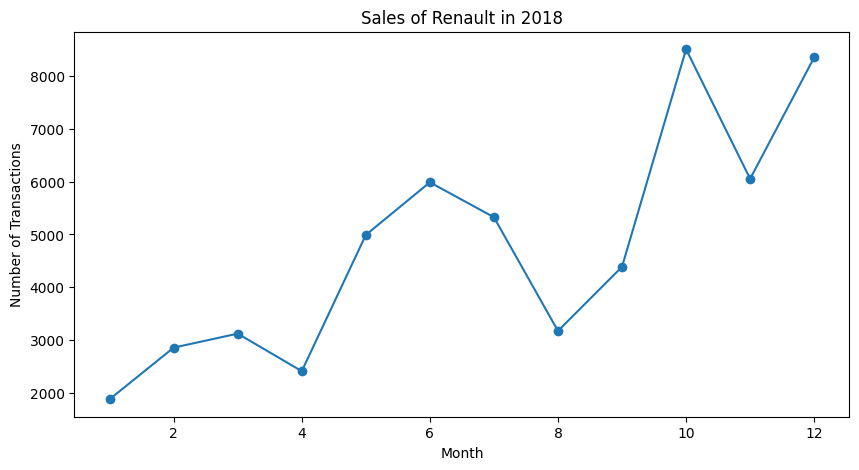

In [11]:
transactions["year"] = transactions["date"].dt.year
transactions["month"] = transactions["date"].dt.month

product_id = "Renault"
year = 2018
product_sales = transactions[(transactions["product_id"] == product_id) & (transactions["year"] == year)].groupby("month").size()

plt.figure(figsize=(10, 5))
product_sales.plot(kind="line", marker="o")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.title(f"Sales of {product_id} in {year}")

# At any time, what are the top 5 products that drove the highest sales over the last six months?

C:\Users\moote\AppData\Local\Temp\ipykernel_20760\3360771963.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  transactions["year_month"] = transactions["date"].dt.to_period("M")
C:\Users\moote\AppData\Local\Temp\ipykernel_20760\3360771963.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions["year_month"] = transactions["date"].dt.to_period("M")
C:\Users\moote\AppData\Local\Temp\ipykernel_20760\3360771963.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x="product_id", y="sales", palette="Blues_r")


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Renault'),
  Text(1, 0, 'Volkswagen'),
  Text(2, 0, 'Peugeot'),
  Text(3, 0, 'Audi'),
  Text(4, 0, 'BMW')])

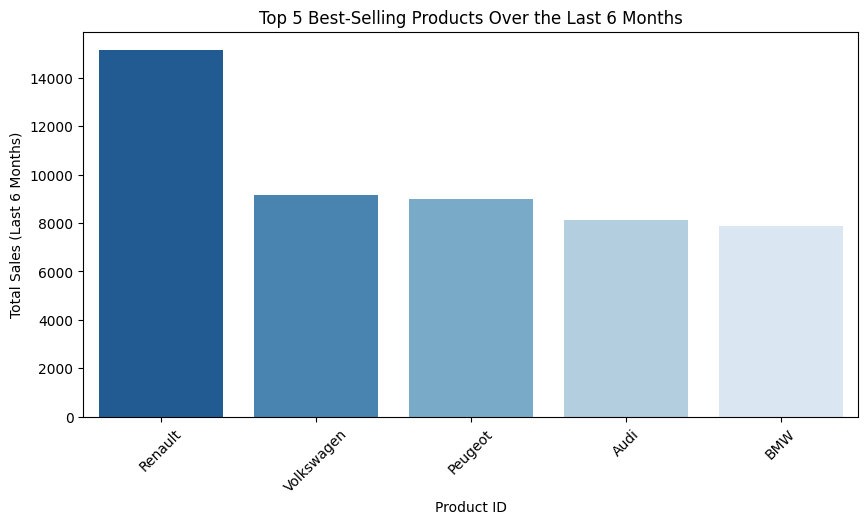

In [32]:
current_month = pd.Period("2020-02", freq="M")
transactions["year_month"] = transactions["date"].dt.to_period("M")
filtered_transactions = transactions[(transactions.year_month >= current_month - 6) & (transactions.year_month < current_month)]
top_products = filtered_transactions.groupby("product_id").size().reset_index(name="sales").sort_values(by="sales", ascending=False).head(5)

plt.figure(figsize=(10, 5))
sns.barplot(data=top_products, x="product_id", y="sales", palette="Blues_r")
plt.xlabel("Product ID")
plt.ylabel("Total Sales (Last 6 Months)")
plt.title("Top 5 Best-Selling Products Over the Last 6 Months")
plt.xticks(rotation=45)

# Do you see a seasonality effect in this data set?

C:\Users\moote\AppData\Local\Temp\ipykernel_20760\1333958811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions["year"] = transactions["date"].dt.year
C:\Users\moote\AppData\Local\Temp\ipykernel_20760\1333958811.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions["month"] = transactions["date"].dt.month


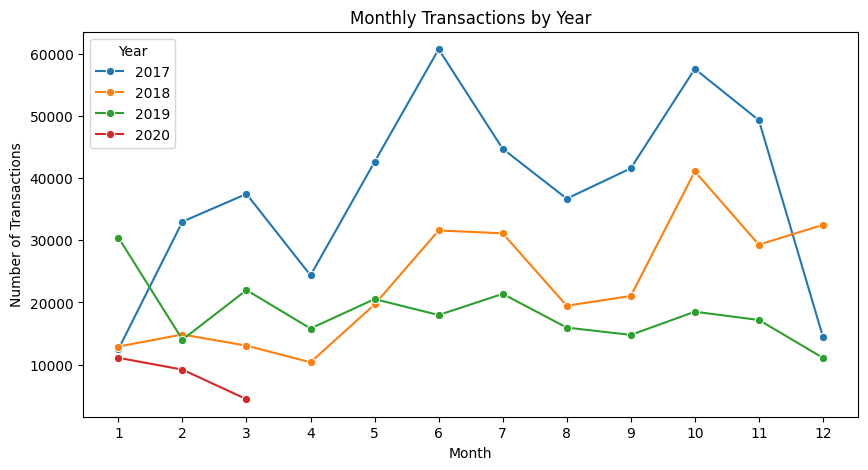

In [46]:
transactions["year"] = transactions["date"].dt.year
transactions["month"] = transactions["date"].dt.month
transactions_per_month_year = transactions.groupby(["year", "month"]).size().reset_index(name="count")

plt.figure(figsize=(10, 5))
sns.lineplot(data=transactions_per_month_year, x="month", y="count", hue="year", marker="o", palette="tab10")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.title("Monthly Transactions by Year")
plt.xticks(range(1, 13))
plt.legend(title="Year")

The graph shows the number of transactions per month from 2017 to 2020. Some key observations :

* 2017 had the highest overall transaction numbers, with noticeable peaks around June and October.

* 2018 followed a similar pattern but with lower transaction counts.

* 2019 had a relatively stable trend without major spikes.

* 2020 showed the lowest numbers overall, especially in the first half of the year.

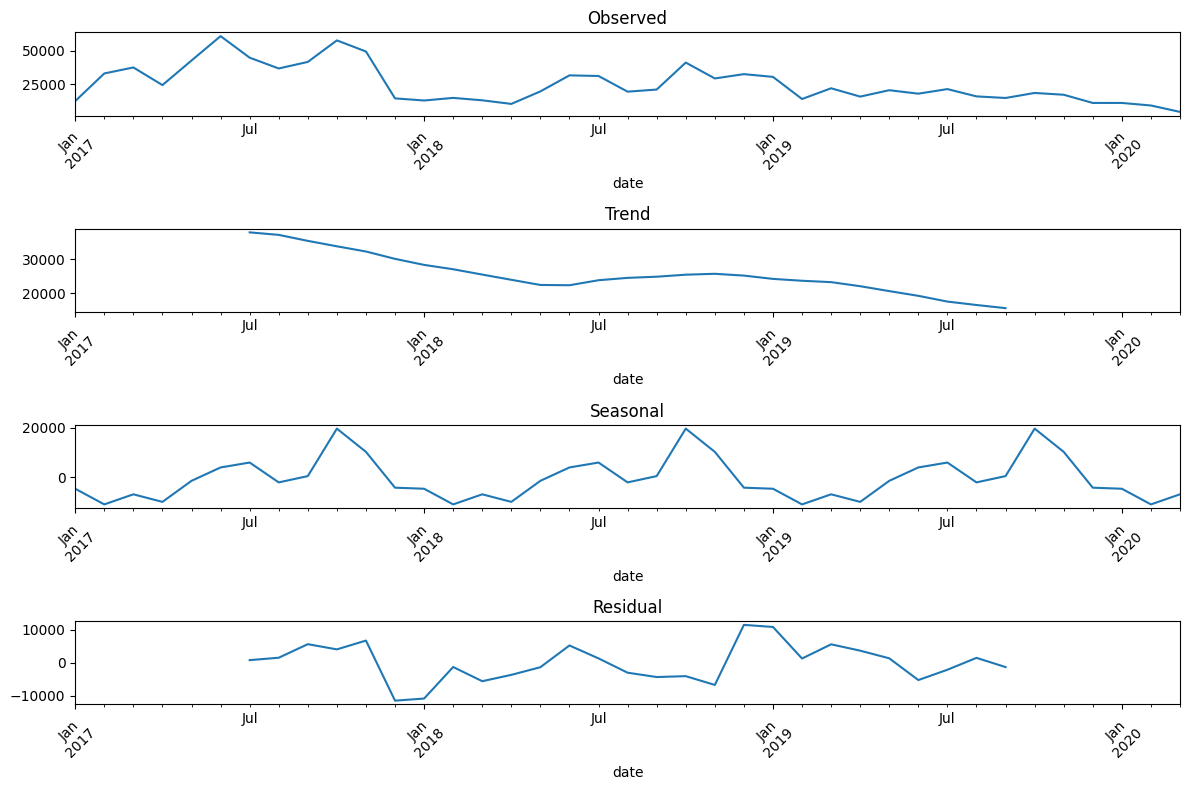

In [54]:
from statsmodels.tsa.seasonal import seasonal_decompose

transactions_per_month_year["date"] = pd.to_datetime(transactions_per_month_year[["year", "month"]].assign(day=1))
transactions_per_month_year.set_index("date", inplace=True)

decomposition = seasonal_decompose(transactions_per_month_year["count"], model="additive", period=12)


fig, axes = plt.subplots(4, 1, figsize=(12, 8))

decomposition.observed.plot(ax=axes[0], legend=False, title="Observed")
decomposition.trend.plot(ax=axes[1], legend=False, title="Trend")
decomposition.seasonal.plot(ax=axes[2], legend=False, title="Seasonal")
decomposition.resid.plot(ax=axes[3], legend=False, title="Residual")

for ax in axes:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()

* The second plot (Trend) indicates a declining trend in the overall number of transactions, especially after 2018.
* The third plot (Seasonal) clearly shows repeating patterns at regular intervals. This confirms that the data exhibits a seasonal effect, with transactions rising and falling in a cyclic manner.